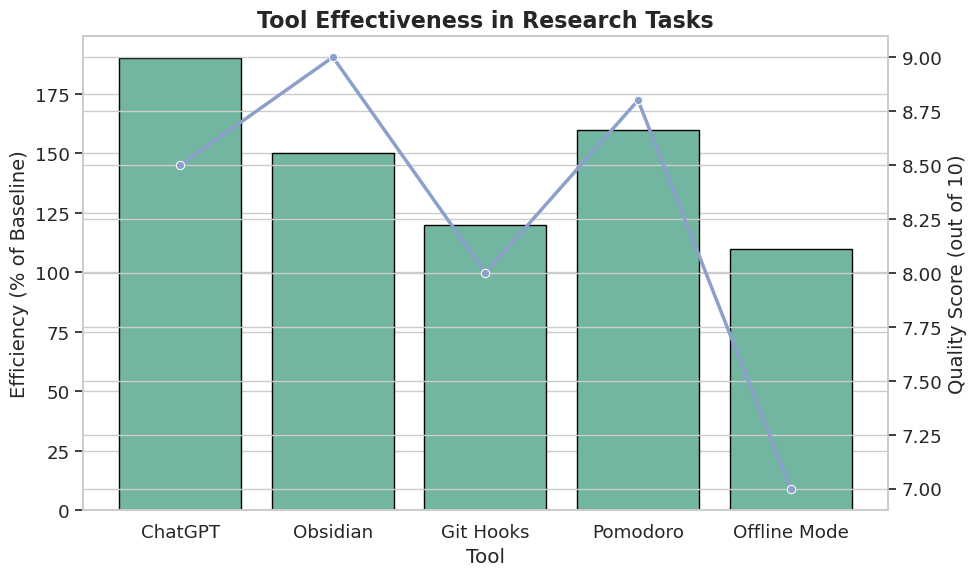

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

tools = ['ChatGPT', 'Obsidian', 'Git Hooks', 'Pomodoro', 'Offline Mode']
efficiency = [190, 150, 120, 160, 110]  # 相对 baseline %
quality = [8.5, 9.0, 8.0, 8.8, 7.0]  # 自评 / 10 分

df = pd.DataFrame({
    'Tool': tools,
    'Efficiency': efficiency,
    'Quality': quality
})

fig, ax1 = plt.subplots(figsize=(10, 6))

color1 = sns.color_palette()[0]
color2 = sns.color_palette()[2]

# 双y轴
ax2 = ax1.twinx()
sns.barplot(data=df, x='Tool', y='Efficiency', ax=ax1, color=color1, edgecolor='black')
sns.lineplot(data=df, x='Tool', y='Quality', ax=ax2, color=color2, marker='o', linewidth=2.5)

# 标签
ax1.set_ylabel('Efficiency (% of Baseline)', fontsize=14)
ax2.set_ylabel('Quality Score (out of 10)', fontsize=14)
ax1.set_title("Tool Effectiveness in Research Tasks", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


/tmp/ipykernel_775499/2032138986.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Strategy', y='Effectiveness', ax=ax1,


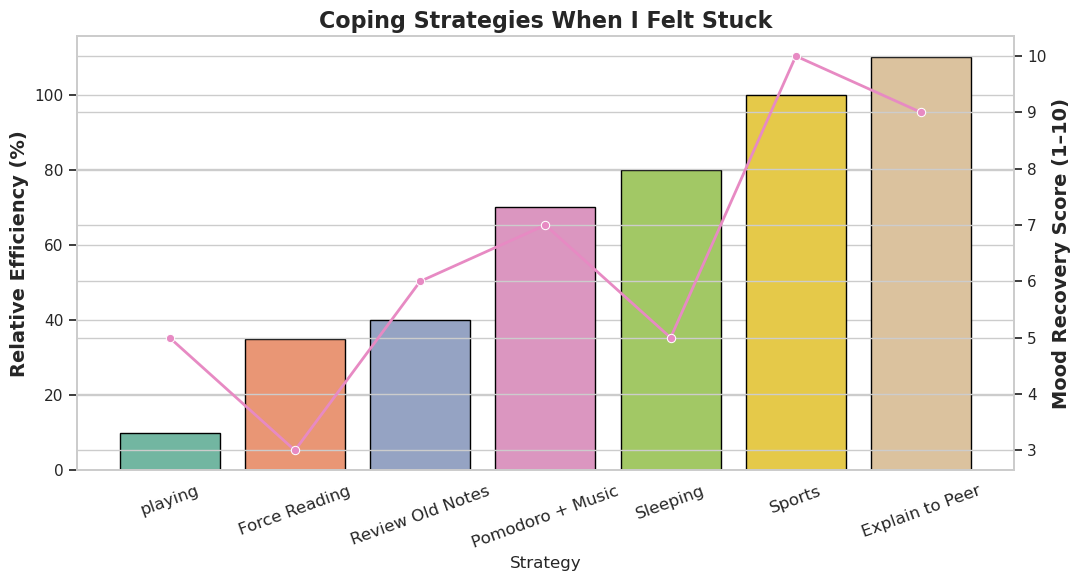

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 设置 seaborn 样式
sns.set(style='whitegrid', palette='Set2')
plt.rcParams.update({'font.size': 13})

# 数据准备
strategies = ['playing', 'Force Reading', 'Review Old Notes', 'Pomodoro + Music', 'Sleeping' ,'Sports', 'Explain to Peer' ]
effectiveness = [10, 35, 40, 70, 80, 100, 110, ]  # 相对效率 (baseline=100)
mood_score = [5, 3, 6, 7,5, 10, 9]  # 情绪恢复评分（这里填满了5项）

df = pd.DataFrame({
    'Strategy': strategies,
    'Effectiveness': effectiveness,
    'Mood Recovery': mood_score
})

# 自定义调色板
colors = sns.color_palette("Set2", n_colors=len(df))

# 开始绘图
fig, ax1 = plt.subplots(figsize=(11, 6))
ax2 = ax1.twinx()

# 条形图：相对效率
sns.barplot(data=df, x='Strategy', y='Effectiveness', ax=ax1,
            palette=colors, edgecolor='black')

# 折线图：情绪恢复评分
sns.lineplot(data=df, x='Strategy', y='Mood Recovery', ax=ax2,
             color=sns.color_palette()[3], marker='o', linewidth=2)

# 设置坐标轴标签和标题
ax1.set_ylabel('Relative Efficiency (%)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Mood Recovery Score (1–10)', fontsize=14, fontweight='bold')
ax1.set_title("Coping Strategies When I Felt Stuck", fontsize=16, fontweight='bold')

# 美化布局
ax1.tick_params(axis='x', rotation=20, labelsize=12)
plt.tight_layout()
plt.show()


/tmp/ipykernel_775499/2257105034.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
/tmp/ipykernel_775499/2257105034.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['Strategy'], fontsize=14)


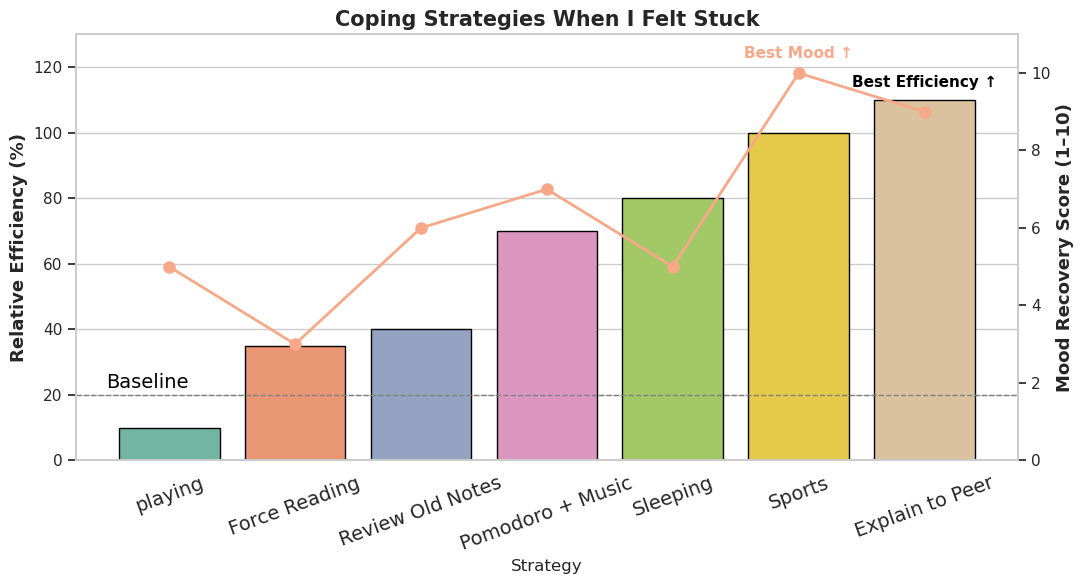

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 设置样式
sns.set(style='whitegrid')
plt.rcParams.update({'font.size': 12})

# 数据准备
strategies = ['playing', 'Force Reading', 'Review Old Notes', 'Pomodoro + Music', 'Sleeping', 'Sports', 'Explain to Peer']
effectiveness = [10, 35, 40, 70, 80, 100, 110]
mood_score = [5, 3, 6, 7, 5, 10, 9]

# 构造 DataFrame 并排序
df = pd.DataFrame({
    'Strategy': strategies,
    'Effectiveness': effectiveness,
    'Mood Recovery': mood_score
})
df = df.sort_values('Effectiveness', ascending=True).reset_index(drop=True)

# 调色板
colors = sns.color_palette("Set2", n_colors=len(df))
highlight_color = sns.color_palette("coolwarm")[4]

# 绘图
fig, ax1 = plt.subplots(figsize=(11, 6))
ax2 = ax1.twinx()

# 条形图：效率
bars = sns.barplot(
    data=df, x='Strategy', y='Effectiveness',
    ax=ax1, palette=colors, edgecolor='black'
)

# 参考线：baseline
ax1.axhline(20, color='gray', linestyle='--', linewidth=1)
ax1.text(len(df)-7.5, 22, "Baseline", color='black', fontsize=14)

# 替代折线图：只绘制点和连接线，不使用 seaborn 的 lineplot
ax2.plot(range(len(df)), df['Mood Recovery'], color=highlight_color, marker='o', 
         linewidth=2, markersize=8, label='Mood Recovery')
# 或者，可以使用散点图代替折线图
# ax2.scatter(range(len(df)), df['Mood Recovery'], color=highlight_color, s=100, label='Mood Recovery')

# 标注最大值
max_eff_idx = df['Effectiveness'].idxmax()
ax1.text(
    max_eff_idx, df.loc[max_eff_idx, 'Effectiveness'] + 4,
    "Best Efficiency ↑", ha='center', color='black', fontsize=11, fontweight='bold'
)

max_mood_idx = df['Mood Recovery'].idxmax()
ax2.text(
    max_mood_idx, df.loc[max_mood_idx, 'Mood Recovery'] + 0.4,
    "Best Mood ↑", ha='center', color=highlight_color, fontsize=11, fontweight='bold'
)

# 标签设置
ax1.set_ylabel('Relative Efficiency (%)', fontsize=13, fontweight='bold')
ax2.set_ylabel('Mood Recovery Score (1–10)', fontsize=13, fontweight='bold')
ax1.set_title("Coping Strategies When I Felt Stuck", fontsize=15, fontweight='bold')
ax1.set_ylim(0, 130)
ax2.set_ylim(0, 11)

# ax2.spines['right'].set_visible(False)  # 隐藏右边边框（可选）
ax2.grid(False)  # 不显示右侧坐标轴网格
# 横坐标样式
ax1.tick_params(axis='x', rotation=20)
ax1.set_xticklabels(df['Strategy'], fontsize=14)

plt.tight_layout()

# save as fig
plt.savefig('coping_strategies.png', dpi=300, bbox_inches='tight')

plt.show()